In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import re


def load_json_to_dataframe(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
    return pd.DataFrame(data['data'])

def jitter_labels(y, sigma=0.05):
    """Adding random noise to the data"""
    return np.clip(np.random.normal(y, sigma), 0, 1)

# Data from Homepage
data is from API

In [2]:
link_homepage = '../data/homepage_posts_data.json'
df_homepage = load_json_to_dataframe(link_homepage)

In [3]:
df_homepage.columns

Index(['id', 'created_at', 'title', 'slug', 'description', 'source', 'author',
       'published_at', 'votes', 'voted', 'comments', 'tags', 'hot', 'adult',
       'media', 'editable', 'deletable', 'resource', 'actions', 'archive',
       'observed_discussion', 'parent', 'tag_pinned_content', 'pinnable',
       'recommended', 'family_friendly', 'favourite', 'alerts', 'ama'],
      dtype='object')

In [4]:
df_homepage = df_homepage.drop(columns=[
    'created_at', 'source', 'slug', 'published_at', 'hot', 'adult', 'media', 'observed_discussion', 'parent', 'tag_pinned_content', 'pinnable', 'editable', 'deletable', 'resource', 'actions', 'archive', 'recommended', 'family_friendly', 'favourite', 'ama', 'voted'
])

In [5]:
df_homepage['author'] = df_homepage['author'].apply(lambda x: x['username'])
df_homepage['downvotes'] = df_homepage['votes'].apply(lambda x: x['down'])
df_homepage['votes'] = df_homepage['votes'].apply(lambda x: x['up'])

In [6]:
df_homepage

,id,title,description,author,votes,comments,tags,alerts,downvotes
0,7766021,Pracujących Polaków nie stać nawet na metr mie...,Polaków nie stać na zakup nawet 1 m kw. mieszk...,ross-flow,485,"{'hot': False, 'count': 222}","[nieruchomosci, wynajem, rynekwtorny, mieszkania]",[],13
1,7798801,"Owczarki zaatakowały jamnika. Brutus nie żyje,...",To był spacer jak każdego innego dnia. Nagle ł...,coiber,631,"{'hot': False, 'count': 101}","[lodz, psy, pies, psiarze, bekazpodludzi]",[],30
2,7667729,Mocne oświadczenie PZN po aferze w skokach. Li...,Tymczasowe zawieszenie sztabu szkoleniowego i ...,Bobito,288,"{'hot': False, 'count': 56}","[sport, skoki, skokinarciarskie, swiat]",[],4
3,7798789,Jak ojciec Sebastiana M. stracił milion złotyc...,"Właścicielem pojazdu był Jarosław M., ojciec S...",Kolekcjoner_dusz,707,"{'hot': False, 'count': 207}","[sebastianmajtczak, majtczak, polskiedrogi, wy...",[],4
4,7766029,zus anulował rente,"mieszkanka Szczecina, miała 27 lat, gdy straci...",stefan_1971,458,"{'hot': False, 'count': 123}","[zus, renta]",[],10
...,...,...,...,...,...,...,...,...,...
9858,7733231,xcancel.com - przeglądaj twitty I odpowiedzi b...,"W sumie trochę mnie dziwi, ze ta stronka nie j...",Returned,438,"{'hot': False, 'count': 32}","[technologia, twitter, lifehack, internet]",[],5
9859,7700465,Tani sposób Niemców na oczyszczanie wody. W Po...,"Nowe badanie pokazuje, że mikroplastiki i toks...",Rasteris,427,"{'hot': False, 'count': 53}","[woda, przyroda, nauka, technika, las]",[],9
9860,7798775,"Zabił rodzinę, uciekł ze szpitala. Dożywocia n...","Prokuratura żądała dożywocia, sąd się na to ni...",ZobaczLink,235,"{'hot': False, 'count': 28}","[polska, prawo, sadowehistorie, kryminalne, mo...",[],1
9861,7733241,Zabrali i umieścili w rodzinie zastępczej. Czt...,Policja odebrała i umieściła w rodzinie zastęp...,Kolekcjoner_dusz,543,"{'hot': False, 'count': 185}","[warszawa, policja, afera]",[],58


# Data from id scan

In [7]:
# link = '../data/final_combined_results_7631933-7651933.json' # recent posts
link = '../data/final_combined_results_2937495-7229337.json' # from the same range from misinformation repo
df_id = load_json_to_dataframe(link)

In [8]:
df_id.columns

Index(['id', 'status', 'url', 'proxy', 'error', 'title', 'points',
       'description', 'added_date', 'tags', 'alerts', 'comments'],
      dtype='object')

In [9]:
df_id = df_id[df_id['error'].isna()]

In [10]:
df_id = df_id.drop(columns=['status', 'proxy', 'error']).reset_index(drop=True)

In [11]:
alerts_df_id = df_id[df_id['alerts'].notna()]
alerts_df_id['zakopane'] = alerts_df_id['alerts'].apply(lambda x: x['title'] == 'To Znalezisko zostało zakopane')
alerts_df_id['duplikat'] = alerts_df_id['alerts'].apply(lambda x: (x['title'] == 'To Znalezisko zostało wyrzucone') and ('Duplikat' in x['body']))
print("Count of alerts: ", len(alerts_df_id))

# Check if all alerts are either 'zakopane' or 'duplikat'
zakopane_duplikat = (alerts_df_id['zakopane'] | alerts_df_id['duplikat']).all()

if zakopane_duplikat:
    print("All alerts are either 'zakopane' or 'duplikat'")
    
    # Remove the 'alerts' column as it is no longer needed
    alerts_df_id = alerts_df_id.drop(columns=['alerts'])

    # can remove duplicates now
    alerts_df_id = alerts_df_id[~alerts_df_id['duplikat']].drop(columns=['duplikat'])

Count of alerts:  2384


C:\Users\juziu\AppData\Local\Temp\ipykernel_22004\3722623095.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alerts_df_id['zakopane'] = alerts_df_id['alerts'].apply(lambda x: x['title'] == 'To Znalezisko zostało zakopane')
C:\Users\juziu\AppData\Local\Temp\ipykernel_22004\3722623095.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alerts_df_id['duplikat'] = alerts_df_id['alerts'].apply(lambda x: (x['title'] == 'To Znalezisko zostało wyrzucone') and ('Duplikat' in x['body']))


## Get comments and see if they contain information about manipulation and check their points

**NOTE**: this is still important to check because word 'manipulation' can also not address the original post

In [12]:
# content: None means that there was some multimedia posted and no text
df_id['comments_content_points'] = df_id['comments'].apply(lambda x: [(c['content'], c['points']) for c in x if c['content'] is not None])

In [13]:
import re
pattern = re.compile(r'\bmanipula\w*\b', flags=re.IGNORECASE)

df_id['mentions_manipulation'] = df_id['comments_content_points'] \
    .apply(lambda list_c:
        any(pattern.search(c[0]) for c in list_c if isinstance(c[0], str))
    )

In [14]:
df_id['top_manipulation_comment'] = df_id['comments_content_points'].apply(
    lambda comments: max(
        (c for c in comments if pattern.search(c[0])),
        key=lambda c: c[1],
        default=None
    )
)

## Is comment containing 'informacja nieprawdziwa' or 'nieprawdziwa informacja'

In [15]:
df_id['comment_informacja_nieprawdziwa'] = df_id['comments_content_points'].apply(
    lambda comments: max(
        (c for c in comments if re.compile(r'informacja nieprawdziwa|nieprawdziwa informacja', re.IGNORECASE).search(c[0])),
        key=lambda c: c[1],
        default=None
    )
)

In [16]:
df_id['comment_informacja_nieprawdziwa'].notna().sum()

np.int64(59)

In [17]:
comment_informacja_nieprawdziwa_points = df_id[df_id['comment_informacja_nieprawdziwa'].notna()]['comment_informacja_nieprawdziwa'].apply(lambda x: x[1])\
      / df_id[df_id['comment_informacja_nieprawdziwa'].notna()]['points'].abs()

df_id.loc[comment_informacja_nieprawdziwa_points.index, 'score_informacja_nieprawdziwa'] = comment_informacja_nieprawdziwa_points

### Method involves label smoothing - model will not generalize well possibly

In [18]:
df_id.loc[alerts_df_id.index, 'score_zakopane_fuzzy'] = np.clip(
    np.random.normal(loc=0.7, scale=0.05, size=len(alerts_df_id.index)),
    0, 1
)

df_id.loc[alerts_df_id.index, 'score_zakopane'] = 0.7

In [19]:
df_id['scores_fuzzy'] = df_id[['score_informacja_nieprawdziwa', 'score_zakopane_fuzzy']].sum(axis=1, skipna=True).fillna(0)
df_id['scores'] = df_id[['score_informacja_nieprawdziwa', 'score_zakopane']].sum(axis=1, skipna=True).fillna(0)

In [20]:
# only for the fuzzy values
df_id.loc[df_id[df_id['scores_fuzzy'] == 0].index, 'scores_fuzzy'] = np.clip(
    np.random.normal(loc=0, scale=0.05, size=len(df_id[df_id['scores_fuzzy'] == 0].index)),
    0, 1
)

In [21]:
df_id = df_id.rename(columns={'points': 'votes'})

# Data from Misinformation archive
https://wykoppl-informacjanieprawdziwa.surge.sh/

In [22]:
df_misinfo = load_json_to_dataframe('../data/mssinfo_wykop_posts.json')

In [23]:
df_misinfo['scores'] = 1

df_misinfo['scores_fuzzy'] = np.clip(
    np.random.normal(loc=1, scale=0.05, size=len(df_misinfo.index)),
    0, 1
)

# Analysis

Data From ID scan: `df`  
Data from homepage: `df_homepage`  
Data from misinfo list: `df_misinfo`

In [24]:
df_homepage.columns

Index(['id', 'title', 'description', 'author', 'votes', 'comments', 'tags',
       'alerts', 'downvotes'],
      dtype='object')

For now, `df_homepage` is not yet to be joined because the comments are not fetched

In [25]:
df_id.columns

Index(['id', 'url', 'title', 'votes', 'description', 'added_date', 'tags',
       'alerts', 'comments', 'comments_content_points',
       'mentions_manipulation', 'top_manipulation_comment',
       'comment_informacja_nieprawdziwa', 'score_informacja_nieprawdziwa',
       'score_zakopane_fuzzy', 'score_zakopane', 'scores_fuzzy', 'scores'],
      dtype='object')

In [26]:
df_misinfo.columns

Index(['id', 'url', 'title', 'description', 'added_date', 'author', 'tags',
       'alerts', 'votes', 'downvotes', 'scores', 'scores_fuzzy'],
      dtype='object')

In [27]:
df_id_ready = df_id.drop(columns=[
    'id', 'url', 'added_date', 'alerts', 'comments', 'comments_content_points', 
    'mentions_manipulation', 'top_manipulation_comment', 'comment_informacja_nieprawdziwa',
    'score_informacja_nieprawdziwa', 'score_zakopane'
    ]
)

In [28]:
df_id_ready.head()

,title,votes,description,tags,score_zakopane_fuzzy,scores_fuzzy,scores
0,Pitbull Nowe porządki [Online] Pitbull Cały Fi...,0.0,Pitbull Nowe porządki [Online] Pitbull Cały Fi...,[],0.723946,0.723946,0.7
1,Zamachowiec z Brukseli pracował jako sprzątacz...,488.0,Jeden z zamachowców z Brukseli pracował przez ...,"[polityka, zamach, terroryzm]",NaN,0.000000,0.0
2,Będzie referendum ws. imigrantów w Polsce! - k...,16.0,https://facebook.com/IndependentVideoPress Będ...,[polska],NaN,0.030551,0.0
3,Nóż otwiera się w kieszeni - Szef klubu PO Pol...,7.0,Oczywiście nie mógł powiedzieć o niej ani jedn...,"[polska, polityka, kultura, wykop, korwin, kukiz]",NaN,0.000000,0.0
4,None,5.0,"""Wyjmują nóż, grożą kierowcom, niszczą towar, ...","[polska, europa, swiat, ekonomia, polityka, im...",NaN,0.050616,0.0


In [29]:
df_misinfo_ready = df_misinfo.drop(columns=[
    'id', 'url', 'added_date', 'author', 'alerts', 'downvotes'
    ]
)

In [30]:
df_misinfo_ready.head()

,title,description,tags,votes,scores,scores_fuzzy
0,We Francji spokojnie. W sylwestra spalono tylk...,"W noc sylwestrową we Francji spalono ""tylko"" 9...","[europa, swiat, imigranci, ciekawostki, francja]",2305,1,0.941252
1,[Afera Prezydencka] Moderator fDy,A gdyby tak większa ilość użytkowników #wykop ...,"[wykop, afera, aferaprezydecka, lechwalesacont...",428,1,1.000000
2,Szczera wypowiedź Tomasza Lisa,pan redaktor w końcu powiedział co tak naprawd...,"[polityka, heheszki, lisnadzis, kod, media]",1357,1,0.984641
3,Inwazja zombie-islamu na Europę stała się fakt...,Zobaczcie jak przybysze bawią się z Niemką w c...,"[europa, islam, imigranci, kolonia, uchodzcy, ...",145,1,1.000000
4,Czy tak wyglądały ataki w Koloni w Nowy Rok?,Podejrzewam że to dopiero początek wrzut tego ...,"[europa, imigranci, islam]",33,1,1.000000


In [31]:
df = pd.concat([df_misinfo_ready, df_id_ready], ignore_index=True)

In [32]:
df['scores'] = df['scores'].apply(lambda x: min(1, max(0, x)))
df['scores_fuzzy'] = df['scores_fuzzy'].apply(lambda x: min(1, max(0, x)))

<Axes: ylabel='Frequency'>

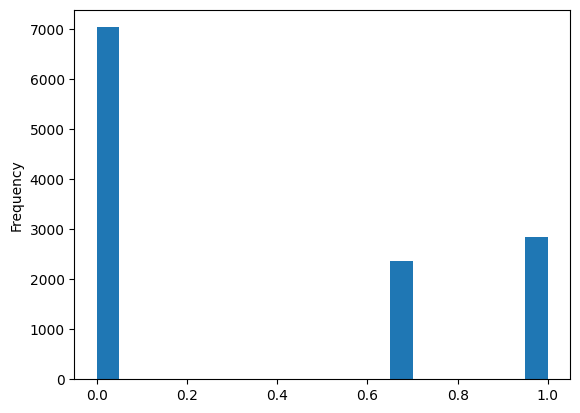

In [33]:
df['scores'].sort_values().plot(kind='hist', bins=20)

<Axes: ylabel='Frequency'>

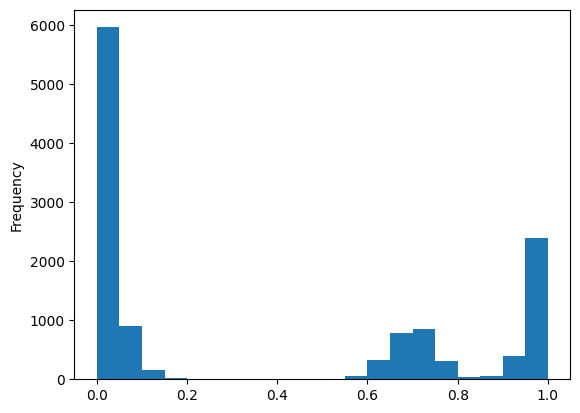

In [34]:
df['scores_fuzzy'].sort_values().plot(kind='hist', bins=20)

# Preparing the data

In [42]:
df["text"] = (
    df["title"].fillna('') + " " +
    df["description"].fillna('') + " " +
    df["tags"].apply(lambda x: " ".join(x) if isinstance(x, list) else x)
)

# Alternative way - exclude the tags, they might be too much of an outlier
df['clean_text_no_tags'] = (
    df["title"].fillna('') + " " +
    df["description"].fillna('')
)

In [43]:
def clean_text(t):
    def _normalize_polish_characters(text):
        mapping = {
            "ą": "a", "ć": "c", "ę": "e", "ł": "l",
            "ń": "n", "ó": "o", "ś": "s", "ź": "z", "ż": "z",
            "Ą": "A", "Ć": "C", "Ę": "E", "Ł": "L",
            "Ń": "N", "Ó": "O", "Ś": "S", "Ź": "Z", "Ż": "Z"
        }
        for k, v in mapping.items():
            text = text.replace(k, v)
        return text
    t = t.lower()
    t = _normalize_polish_characters(t)
    t = re.sub(r"http\S+", "", t)
    t = re.sub(r"[^a-z0-9\s]", "", t)
    return t.strip()

df["clean_text"] = df["text"].apply(clean_text)

In [44]:
df['clean_text'].head()

0    we francji spokojnie w sylwestra spalono tylko...
1    afera prezydencka moderator fdy a gdyby tak wi...
2    szczera wypowiedz tomasza lisa pan redaktor w ...
3    inwazja zombieislamu na europe stala sie fakte...
4    czy tak wygladaly ataki w koloni  w nowy rok p...
Name: clean_text, dtype: object

# Initial model

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(df["clean_text"], df["scores"], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1,2),
    min_df=2
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = Ridge(alpha=1.0)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MAE: 0.3169606578238771
R²: 0.2618938919889746


In [46]:
for pr, ts, x_ts, _ in zip(y_pred, y_test, X_test, range(10)):
    print(pr, ts, x_ts)

0.05662699197173582 1.0 johnny depp wraca do roli kapitana jacka sparrowa johnny depp ponownie chwyci za butelke rumu i szable  aktor wroci do piratow z karaibow ponownie wcielajac sie w postac kapitana jacka sparrowa the sun podaje ze probna sesje zdjeciowa do nowej czesci dzien na morzu zaplanowano na luty 2023 roku bedzie to szosta odslona uniwersum kultura rozrywka film piractwo metoo kino
0.687127081688198 1.0 wpolitycepl lamie cisze wyborcza trzeba anulowac bo przegramy polska bekazpisu wybory tvpis ciszawyborcza
0.2554214097423637 0.0 uwazajcie choroba zbiera coraz wieksze zniwo a to dopiero poczatek sezonu borelioza zniszczyla jej zycie odwrocili sie od niej przyjaciele wmawiali ze jest hipochondryczka w koncu zrobila test na borelioze okazalo sie ze byla chora choc nie pamieta by kiedykolwiek ugryzl ja kleszcz polska borelioza kleszcze
0.36591472667156055 0.0 nagroda na festiwalu komikow zmieni nazwe z powodu oskarzen o transfobie nagroda imienia barryego humphriesa zmieni naz

## Change problem to classification

In [47]:
df["label"] = df["scores"].apply(lambda x: 0 if x < 0.35 else (2 if x > 0.85 else 1))

df["label"].value_counts(normalize=True)

label
0    0.574272
2    0.231667
1    0.194062
Name: proportion, dtype: float64

In [48]:
df = df[~df['clean_text'].duplicated()].reset_index(drop=True)

              precision    recall  f1-score   support

           0      0.732     0.660     0.694      1407
           1      0.335     0.401     0.365       474
           2      0.635     0.689     0.661       553

    accuracy                          0.616      2434
   macro avg      0.568     0.583     0.573      2434
weighted avg      0.633     0.616     0.622      2434



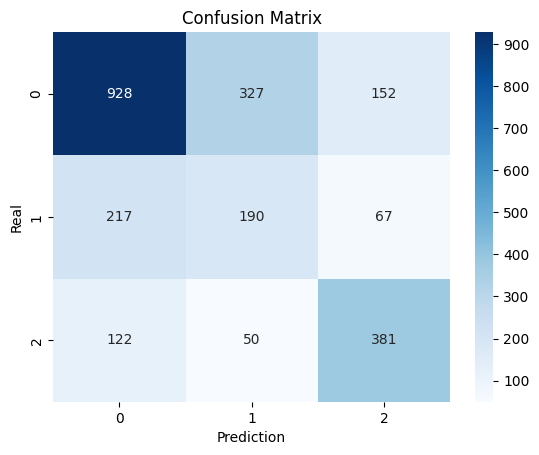

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def train_tfidf_logistic_regression_model(df, x_column: str, y_column: str):
    X_train, X_test, y_train, y_test = train_test_split(
        df[x_column], df[y_column], test_size=0.2, random_state=42, stratify=df["label"]
    )


    model = Pipeline([
        ("tfidf", TfidfVectorizer(max_features=10000, ngram_range=(1,2), min_df=2)),
        ("clf", LogisticRegression(max_iter=1000, class_weight='balanced'))
    ])

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred, digits=3))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Prediction")
    plt.ylabel("Real")
    plt.title("Confusion Matrix")
    plt.show()
    
    return model

model = train_tfidf_logistic_regression_model(df, x_column="clean_text", y_column="label")

### Class balancing

In [50]:
df['label'].value_counts()[0] / df['label'].value_counts()

label
0    1.000000
2    2.546869
1    2.971706
Name: count, dtype: float64

              precision    recall  f1-score   support

           0      0.746     0.700     0.722      1407
           1      0.783     0.811     0.797      1408
           2      0.867     0.890     0.878      1408

    accuracy                          0.800      4223
   macro avg      0.799     0.800     0.799      4223
weighted avg      0.799     0.800     0.799      4223



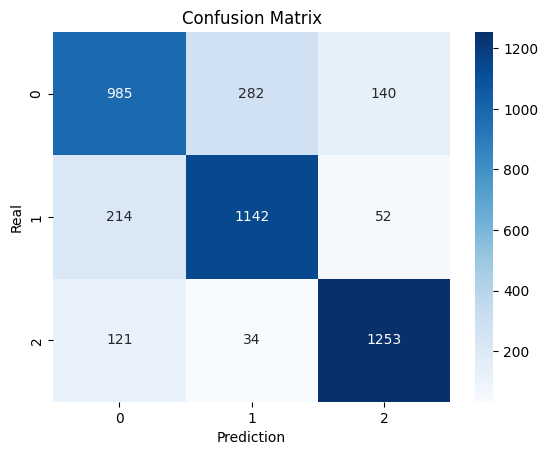

In [51]:
from sklearn.utils import resample

majority = df[df.label == 0]
minority1 = df[df.label == 1]
minority2 = df[df.label == 2]

minority1_upsampled = resample(minority1, replace=True, n_samples=len(majority), random_state=42)
minority2_upsampled = resample(minority2, replace=True, n_samples=len(majority), random_state=42)

df_balanced = pd.concat([majority, minority1_upsampled, minority2_upsampled])

# Retraining
model = train_tfidf_logistic_regression_model(df_balanced, x_column="clean_text", y_column="label")

In [52]:
def show_most_important_words_multiclass(pipeline_model, top_n=15, show_discriminative=True):
    """
    pipeline_model: Pipeline with steps 'tfidf' i 'clf'
    top_n: how many words to show for each class
    show_discriminative: to show the most discrimative variable
    """
    try:
        vectorizer = pipeline_model.named_steps['tfidf']
        clf = pipeline_model.named_steps['clf']
    except Exception as e:
        raise ValueError("Model should contain Pipeline with steps: 'tfidf' i 'clf'.") from e

    feature_names = np.array(vectorizer.get_feature_names_out())
    coefs = clf.coef_
    
    if coefs.ndim == 1:
        coefs = coefs.reshape(1, -1)

    n_classes = coefs.shape[0]
    classes = clf.classes_

    for i, cls in enumerate(classes):
        if len(classes) == 2 and i == 1:
            break
        
        print(f"\n\n=== Class: {cls} (index {i}) ===")
        coef_i = coefs[i]

        top_pos_idx = np.argsort(coef_i)[-top_n:][::-1]
        print(f"\nTop {top_n} features for class {cls}:")
        for idx in top_pos_idx:
            print(f"{feature_names[idx]} ({coef_i[idx]:.4f})")

        top_neg_idx = np.argsort(coef_i)[:top_n]
        print(f"\nTop {top_n} features against class {cls}:")
        for idx in top_neg_idx:
            print(f"{feature_names[idx]} ({coef_i[idx]:.4f})")

        if show_discriminative and n_classes > 1:
            others_max = np.max(np.delete(coefs, i, axis=0), axis=0)
            discriminative_score = coef_i - others_max
            top_disc_idx = np.argsort(discriminative_score)[-top_n:][::-1]
            print(f"\nTop {top_n} the most discrimative features {cls}:")
            for idx in top_disc_idx:
                print(f"{feature_names[idx]} (diff={discriminative_score[idx]:.4f}, coef={coef_i[idx]:.4f})")
    
show_most_important_words_multiclass(model, 5)



=== Class: 0 (index 0) ===

Top 5 features for class 0:
historia (2.3657)
gospodarka (2.0203)
sport (1.9964)
kosmos (1.8148)
technologia (1.7588)

Top 5 features against class 0:
wykop (-2.7900)
bekazlewactwa (-2.4924)
lgbt (-2.3828)
moderacja (-2.1836)
szczepienia (-2.1433)

Top 5 the most discrimative features 0:
gospodarka (diff=3.0169, coef=2.0203)
historia (diff=2.9987, coef=2.3657)
kosmos (diff=2.6830, coef=1.8148)
ciekawostkihistoryczne (diff=2.3943, coef=1.6685)
sport (diff=2.3353, coef=1.9964)


=== Class: 1 (index 1) ===

Top 5 features for class 1:
zainteresowania wykop (1.7948)
polska (1.7251)
instagram (1.7084)
kononowicz (1.6980)
polska polityka (1.6906)

Top 5 features against class 1:
moderacja (-2.8236)
afera (-2.5328)
zydzi (-2.0732)
bekazpisu (-2.0732)
polityka polska (-1.9463)

Top 5 the most discrimative features 1:
smieszne (diff=2.4006, coef=1.6805)
polska europa (diff=2.3702, coef=1.5963)
polska (diff=2.3635, coef=1.7251)
zainteresowania wykop (diff=2.3250, co

### Looks like many of these words are tags - they are associated with some label

Let's try to mitigate that and discard tags

              precision    recall  f1-score   support

           0      0.715     0.660     0.686      1407
           1      0.756     0.808     0.781      1408
           2      0.858     0.864     0.861      1408

    accuracy                          0.777      4223
   macro avg      0.776     0.777     0.776      4223
weighted avg      0.776     0.777     0.776      4223



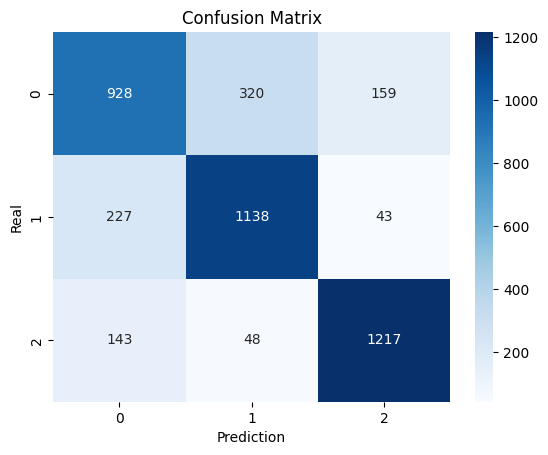



=== Class: 0 (index 0) ===

Top 5 features for class 0:
policjanci (1.7574)
które (1.7201)
rosji (1.6702)
ją (1.5761)
dzięki (1.5483)

Top 5 features against class 0:
lgbt (-2.9499)
moderacja (-2.9246)
wykop (-2.2937)
who (-2.1511)
covid (-2.1362)

Top 5 the most discrimative features 0:
policjanci (diff=2.6000, coef=1.7574)
które (diff=2.2753, coef=1.7201)
ją (diff=2.2049, coef=1.5761)
akcja (diff=2.0869, coef=1.4256)
pierwsze (diff=1.9558, coef=1.5097)


=== Class: 1 (index 1) ===

Top 5 features for class 1:
dziewczyna (1.5883)
instagram (1.5854)
boże (1.5804)
https (1.5477)
major (1.5331)

Top 5 features against class 1:
moderacja (-3.0791)
wykop (-1.9856)
artykuł (-1.7897)
dzieci (-1.7685)
usa (-1.7038)

Top 5 the most discrimative features 1:
boże (diff=2.3672, coef=1.5804)
instagram (diff=2.3036, coef=1.5854)
otworzył (diff=2.2349, coef=1.4992)
dziewczyna (diff=2.1726, coef=1.5883)
subskrybuj (diff=2.1631, coef=1.4965)


=== Class: 2 (index 2) ===

Top 5 features for class 2:


In [53]:
# Retraining
model = train_tfidf_logistic_regression_model(df_balanced, x_column="clean_text_no_tags", y_column="label")

show_most_important_words_multiclass(model, 5)

> `THIS IS FOR THE RECENT POSTS, NOT FOR THE SAME-RANGE POSTS`

With Tags:
```sh
              precision    recall  f1-score   support

           0      0.950     0.856     0.901      1714
           1      0.925     0.995     0.958      1714
           2      0.936     0.957     0.946      1714

    accuracy                          0.936      5142
   macro avg      0.937     0.936     0.935      5142
weighted avg      0.937     0.936     0.935      5142
```

Wihtout Tags: 
```sh
              precision    recall  f1-score   support

           0      0.909     0.820     0.862      1714
           1      0.927     0.991     0.958      1714
           2      0.893     0.919     0.906      1714

    accuracy                          0.910      5142
   macro avg      0.910     0.910     0.909      5142
weighted avg      0.910     0.910     0.909      5142
```

Class 0 and 2 are the most affected - they are most likely using some tags to get better results. Class 1 is mostly not affected. The drop in effectiveness is slight - the recall is very high - which is desirable for class 1 and 2 especially.

### Try only 2 labels classification

In [54]:
df["label"] = df["scores"].apply(lambda x: 0 if x < 0.5 else 1)

df["label"].value_counts(normalize=True)

label
0    0.578649
1    0.421351
Name: proportion, dtype: float64

              precision    recall  f1-score   support

           0      0.734     0.759     0.747      1408
           1      0.653     0.623     0.638      1026

    accuracy                          0.702      2434
   macro avg      0.694     0.691     0.692      2434
weighted avg      0.700     0.702     0.701      2434



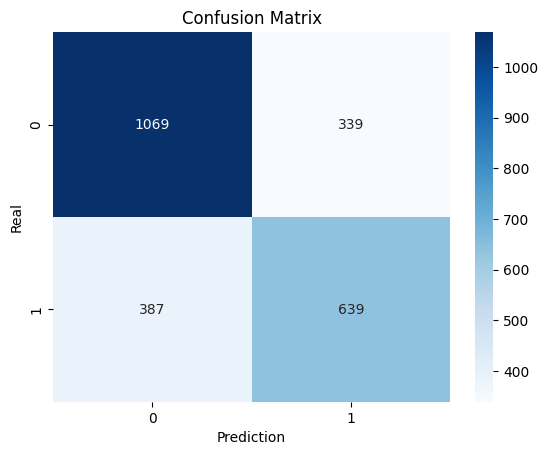

In [55]:
model = train_tfidf_logistic_regression_model(df, x_column="clean_text", y_column="label")

### With balancing

              precision    recall  f1-score   support

           0      0.757     0.797     0.777      1409
           1      0.786     0.744     0.764      1408

    accuracy                          0.771      2817
   macro avg      0.771     0.771     0.771      2817
weighted avg      0.771     0.771     0.771      2817



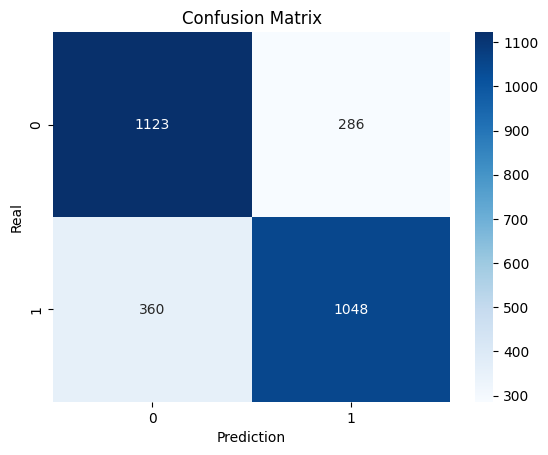

In [56]:
from sklearn.utils import resample

majority = df[df.label == 0]
minority = df[df.label == 1]

minority_upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)

df_balanced = pd.concat([majority, minority_upsampled])

# Retraining
model = train_tfidf_logistic_regression_model(df_balanced, x_column="clean_text", y_column="label")

In [57]:
show_most_important_words_multiclass(model, 5)



=== Class: 0 (index 0) ===

Top 5 features for class 0:
moderacja (4.2426)
lgbt (3.8794)
wykop (3.7456)
bekazlewactwa (3.3957)
afera (3.0748)

Top 5 features against class 0:
historia (-2.8824)
kosmos (-2.1031)
wydarzenia (-2.0787)
technologia (-1.9931)
policjanci (-1.9675)


### Now with excluded tags

              precision    recall  f1-score   support

           0      0.736     0.767     0.751      1409
           1      0.757     0.724     0.740      1408

    accuracy                          0.746      2817
   macro avg      0.746     0.746     0.746      2817
weighted avg      0.746     0.746     0.746      2817



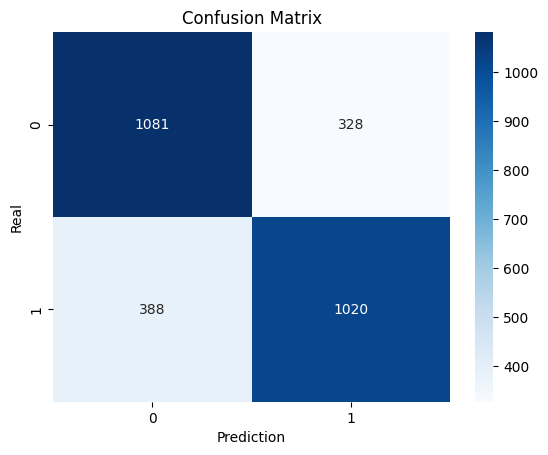



=== Class: 0 (index 0) ===

Top 5 features for class 0:
moderacja (5.0896)
lgbt (4.2868)
wykop (3.7692)
covid (2.8512)
znalezisko (2.5372)

Top 5 features against class 0:
policjanci (-2.2227)
rosji (-1.8862)
może (-1.8841)
pierwsze (-1.8389)
and (-1.7699)


In [58]:
model = train_tfidf_logistic_regression_model(df_balanced, x_column="clean_text_no_tags", y_column="label")

show_most_important_words_multiclass(model, 5)